In [1]:
import lale, aix360
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Important note
This notebook reflects the WORKFLOW for Explainable Data-science, for a deep dive into the methods/routines/mathematics behind each implementation, please review the source material found at:

https://github.com/Trusted-AI/AIX360/
https://github.com/IBM/lale

## Recap of important notes!

The verb to explain is a three-place predicate: Some- one explains something to someone.

Causal explanation is therefore different from causal attribu- tion, which does not involve an interpersonal exchange. In its wider sense, attribution describes a process whereby one as- cribes some phenomenon to its origin.


Source: Hilton, Denis J. Conversational Processes and Causal Explanation.The Ohio State University. American Psychological Association. 1990.

## Description of Bank data:
source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Therefore, we have 10 numeric features, and 11 categorical.

We drop Duration as it is not known ahead of time and will provide unrealistic results for our benchmarking.

# Before we start;
# Visit https://community.ibm.com/community/user/datascience/home for more cool DS content

In [2]:
#import data 
df = pd.read_csv('/Users/eovito@ibm.com/Desktop/Content/Masterclass/CODE_BASE/bank-additional-full.csv',\
                 sep = ';')
df1 = df.copy()

df = df.drop(['duration'], axis = 1)
#show some of the data
df.head(10)


#we will want this information later on 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#get descriptive statistics of numeric values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [4]:
#check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [5]:
#lets do some visualization
import matplotlib.pyplot as plt
import seaborn

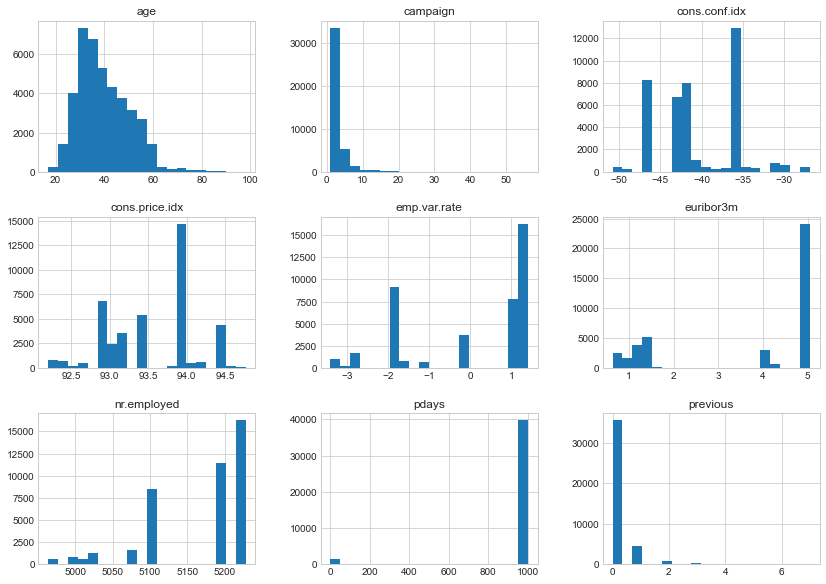

In [6]:
#lets get histograms of our data
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10)) #show distributions of numeric data
plt.show()

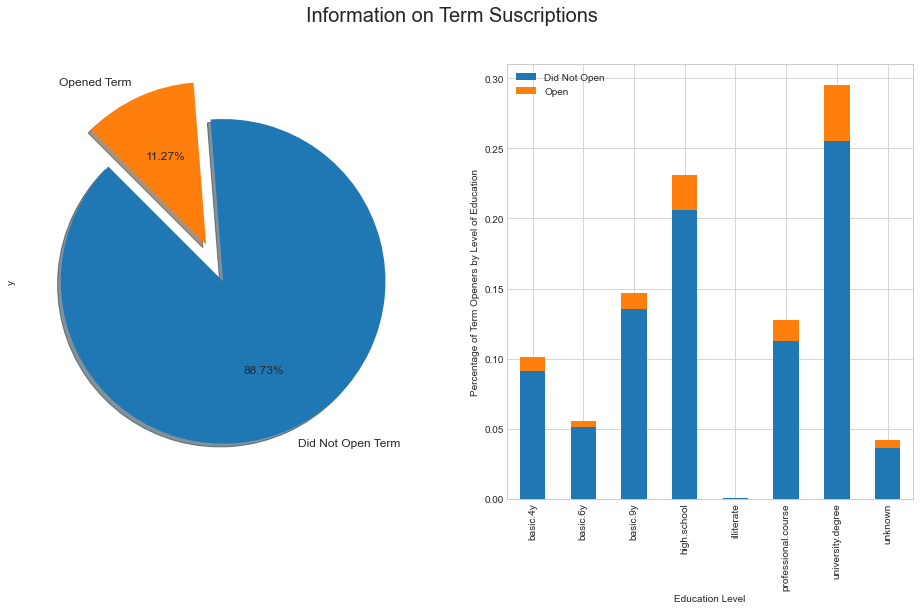

In [7]:
#lets do some more visualization
labels = 'Did Not Open Term', 'Opened Term' 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

#generate the pie chart
df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=135)

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz1 = df.groupby(['education', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True) #generates the bar chart on the left

ax[1].set(ylabel="Percentage of Term Openers by Level of Education")
ax[1].set(xlabel="Education Level")
ax[1].legend(['Did Not Open', 'Open'])

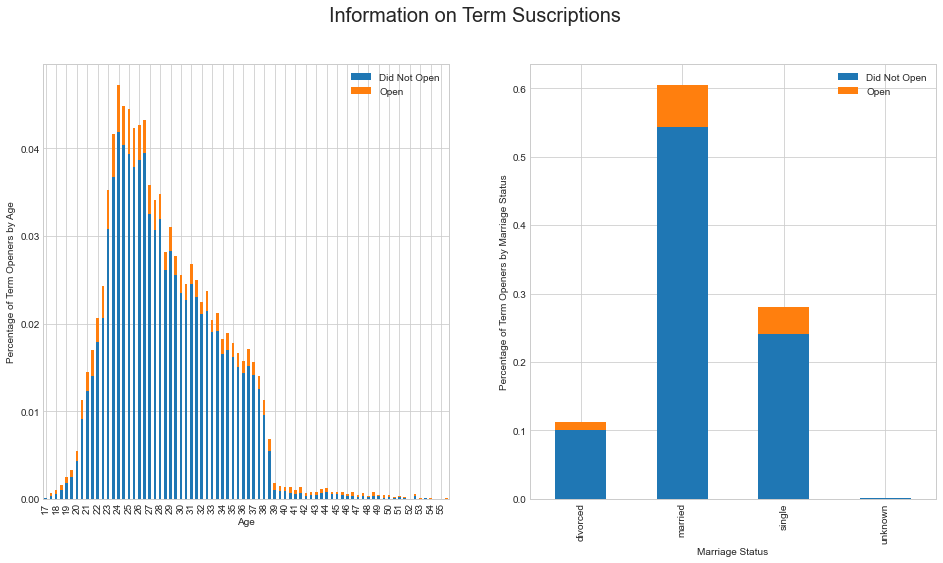

In [8]:
#more visualizations 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz2 = df.groupby(['age', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Age")
ax[0].set(xlabel="Age")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])


viz3 = df.groupby(['marital', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Marriage Status")
ax[1].set(xlabel="Marriage Status")
ax[1].legend(['Did Not Open', 'Open'])

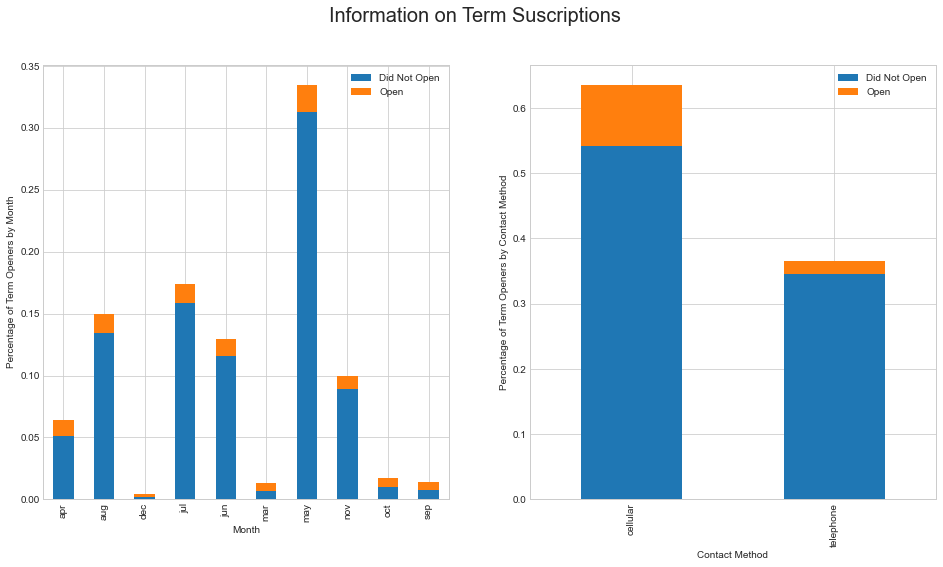

In [9]:
#more visualizations
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz4 = df.groupby(['month', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Month")
ax[0].set(xlabel="Month")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])

viz5 = df.groupby(['contact', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Contact Method")
ax[1].set(xlabel="Contact Method")
ax[1].legend(['Did Not Open', 'Open'])

## Lets do some preperation for modeling!

In [10]:
#lets transform our data to get ready for modeling
from sklearn.model_selection import train_test_split
X, y = df.loc[:, df.columns != 'y'], df['y'].map(dict(yes=1, no=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#lets group different types
num_cols = [col for col in X_train.columns if np.issubdtype(X_train.dtypes[col], np.number)]
cat_cols = [col for col in X_train.columns if col not in num_cols]
print(num_cols, '\n',  cat_cols)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [11]:
from sklearn.preprocessing import LabelEncoder 

#label encoder should be used for y values, however it returns the same results as OrdinalEncoder, and is less finnicky overall
encoder = LabelEncoder()

dependent_var = df['y']                                                                                         
encoded_df = df.copy()

encoded_df = encoded_df.drop(['y'], axis=1)


#lets transform the data into encoded data
encoded_df = encoded_df.apply(encoder.fit_transform)
encoded_df2 = pd.concat([encoded_df, dependent_var], axis = 1)

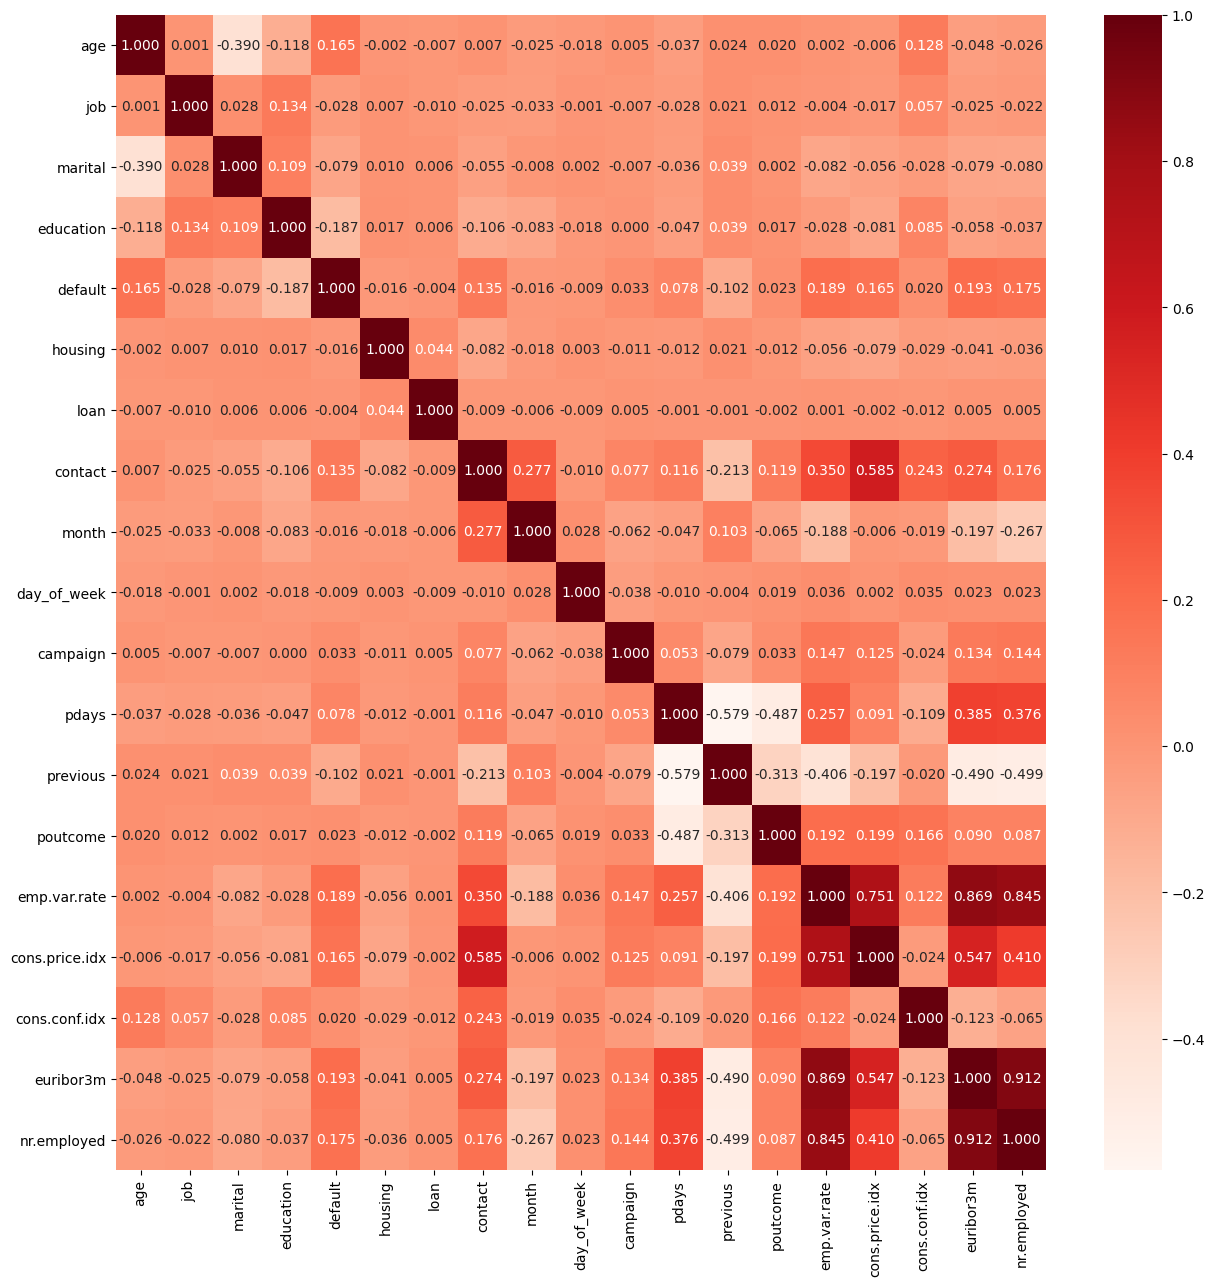

In [77]:
import seaborn as sns
plt.figure(figsize=(15,15))

cor = encoded_df2.corr()
cor
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='0.3f')
plt.show()

## Lets see how a rule based algorithm works!

In [13]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
X_train_fb, dfTrainStd = fb.fit_transform(X_train)
X_test_fb, dfTestStd = fb.transform(X_test)

In [14]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0=1e-3, lambda1=1e-3, CNF=True)

# Train, print, and evaluate model
br.fit(X_train_fb, y_train)
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(y_train, br.predict(X_train_fb)))
print('Test accuracy:', accuracy_score(y_test, br.predict(X_test_fb)))
print('Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:')
print(br.explain()['rules'])

Learning CNF rule with complexity parameters lambda0=0.001, lambda1=0.001


/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/eovito@

Initial LP solved
Iteration: 1, Objective: 0.1044


/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/eovito@

Training accuracy: 0.8975720789074355
Test accuracy: 0.8968196164117505
Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:
['poutcome != success']


We note that AIX360 includes only a heuristic beam search version of BRCG. The published version of BRCG [2] (not implemented in AIX360) uses integer programming to yield slightly more complex rules that are also more accurate

## Lets begin some rapid-prototyping!

In [15]:
#preprocessing
from sklearn.preprocessing import Normalizer as Norm
from sklearn.preprocessing import LabelEncoder as LabelEncoder
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.preprocessing import OrdinalEncoder as OrdinalEncoder
from lale.lib.lale import NoOp
import sklearn

#helper functions
from sklearn.compose import ColumnTransformer
from lale.operators import make_pipeline
from lale.pretty_print import ipython_display

#algorithms
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBoost
# from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as Tree

lale.wrap_imported_operators()

/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/networkx/classes/graph.py:23: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/networkx/classes/reportviews.py:95: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  fr

In [16]:
sorted(sklearn.metrics.SCORERS)

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

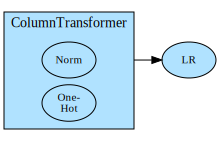

In [17]:
#column transformers takes triples, name, transformer, columns
pipeline_trainable = ColumnTransformer(
    transformers=[
        ('num_tfm', Norm(norm='l1'), num_cols),
        ('cat_tfm', OneHot(), cat_cols)]) >> LR()
pipeline_trainable.visualize()

In [18]:
%%time
pipeline_trained = pipeline_trainable.fit(X_train, y_train)

/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/operators.py:1328: DeprecationWarning: The `transform` method is deprecated on a trainable operator, because the learned coefficients could be accidentally overwritten by retraining. Call `transform` on the trained operator returned by `fit` instead.
  warnings.warn(_mutation_warning('transform'), DeprecationWarning)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/operators.py:1328: DeprecationWarning: The `transform` method is deprecated on a trainable operator, because the learned coefficients could be accidentally overwritten by retraining. Call `transform` on the trained operator returned by `fit` instead.
  warnings.warn(_mutation_warning('transform'), DeprecationWarning)


CPU times: user 756 ms, sys: 33.9 ms, total: 790 ms
Wall time: 789 ms


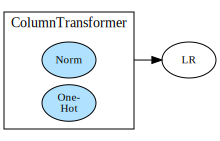

In [19]:
pipeline_trained.visualize()

In [20]:
import sklearn.metrics
predictions = pipeline_trained.predict(X_test)
print(f'accuracy {sklearn.metrics.accuracy_score(y_test, predictions):.1%}')
print(f'accuracy {sklearn.metrics.roc_auc_score(y_test, predictions):.1%}')

accuracy 89.4%
accuracy 57.4%


/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/operators.py:1328: DeprecationWarning: The `transform` method is deprecated on a trainable operator, because the learned coefficients could be accidentally overwritten by retraining. Call `transform` on the trained operator returned by `fit` instead.
  warnings.warn(_mutation_warning('transform'), DeprecationWarning)
/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/operators.py:1328: DeprecationWarning: The `transform` method is deprecated on a trainable operator, because the learned coefficients could be accidentally overwritten by retraining. Call `transform` on the trained operator returned by `fit` instead.
  warnings.warn(_mutation_warning('transform'), DeprecationWarning)


In [21]:
ipython_display(pipeline_trained.to_json())

```python
{'class': 'lale.operators.TrainedPipeline', 'state': 'trained', 'edges': [['column_transformer', 'lr']], 'steps': {'column_transformer': {'class': 'lale.lib.sklearn.column_transformer.ColumnTransformerImpl', 'state': 'trained', 'operator': 'ColumnTransformer', 'label': 'ColumnTransformer', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.column_transformer.html', 'hyperparams': {'transformers': [['num_tfm', {'$ref': '../steps/norm'}, ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], ['cat_tfm', {'$ref': '../steps/one_hot'}, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]]}, 'steps': {'norm': {'class': 'lale.lib.sklearn.normalizer.NormalizerImpl', 'state': 'trainable', 'operator': 'Norm', 'label': 'Norm', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.normalizer.html', 'hyperparams': {'norm': 'l1'}, 'is_frozen_trainable': true}, 'one_hot': {'class': 'lale.lib.sklearn.one_hot_encoder.OneHotEncoderImpl', 'state': 'trainable', 'operator': 'OneHot', 'label': 'OneHot', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.one_hot_encoder.html', 'hyperparams': {}, 'is_frozen_trainable': true}}, 'is_frozen_trainable': true, 'coefs': 'coefs_not_available', 'is_frozen_trained': false}, 'lr': {'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl', 'state': 'trained', 'operator': 'LR', 'label': 'LR', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.logistic_regression.html', 'hyperparams': {}, 'is_frozen_trainable': false, 'coefs': 'coefs_not_available', 'is_frozen_trained': false}}}
```

In [22]:
pipeline_trained.pretty_print(show_imports= False, ipython_display= True)

```python
norm = Norm(norm='l1')
column_transformer = ColumnTransformer(transformers=[('num_tfm', norm, ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']), ('cat_tfm', OneHot(), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])])
pipeline = column_transformer >> LR()
```

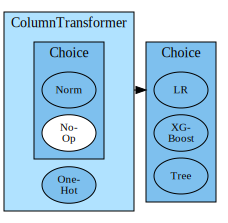

In [23]:
#works now, but will still fail occasionally, the only difference is that Hyperopt is now no longer wrapped_operator
pipeline_planned = ColumnTransformer(transformers=[
        ('num_tfm', Norm | NoOp, num_cols),
        ('cat_tfm', OneHot , cat_cols)]) >> (
    LR | XGBoost | Tree)
pipeline_planned.visualize()

In [24]:
from lale.lib.lale import Hyperopt
#THIS WILL FAIL OCCASSIONALLY, NEEDS TO BE REWORKED ON BACK END TO SEND SCHEMA, NON TRIVIAL
optimizer = Hyperopt(estimator=pipeline_planned, max_evals = 5, scoring='accuracy', verbose = True)
trained_optimizer = optimizer.fit(X_train, y_train)

Exception caught in Hyperopt:<class 'KeyboardInterrupt'>, Traceback (most recent call last):
  File "/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 107, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 100, in hyperopt_train_test
    raise e
  File "/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 80, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/Users/eovito@ibm.com/miniconda3/envs/dev/lib/python3.7/site-packages/lale/helpers.py", line 182, in cross_val_score_track_trials
    trained = estimator.fit(X_train, y_train)
  File "/Users/eovito@ibm.com/mi

In [25]:
trained_optimizer.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.887921,0.596803,0.312091,ok
p2,2,-0.896206,0.752138,0.932573,ok
p3,3,-0.897542,1.086666,1.721489,ok
p4,4,-0.876935,3.742103,0.424556,ok


In [26]:
best_estimator = trained_optimizer.summary().loss.argmin()
worst_estimator = trained_optimizer.summary().loss.argmax()

In [27]:
print(f'The best pipeline is {best_estimator} and the worst pipeline is {worst_estimator}')

The best pipeline is p3 and the worst pipeline is p4


In [28]:
import sklearn.metrics
predictions1 = trained_optimizer.predict(X_test)
print(f'accuracy {sklearn.metrics.accuracy_score(y_test, predictions1):.1%}')
print(f'roc_auc {sklearn.metrics.roc_auc_score(y_test, predictions1):.1%}')

accuracy 89.8%
roc_auc 58.2%


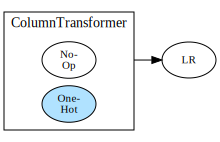

In [29]:
final_estimator = trained_optimizer.get_pipeline()
final_estimator.visualize()

In [30]:
ipython_display(final_estimator.to_json())

```python
{'class': 'lale.operators.TrainedPipeline', 'state': 'trained', 'edges': [['column_transformer', 'lr']], 'steps': {'column_transformer': {'class': 'lale.lib.sklearn.column_transformer.ColumnTransformerImpl', 'state': 'trained', 'operator': 'ColumnTransformer', 'label': 'ColumnTransformer', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.column_transformer.html', 'hyperparams': {'transformers': [['num_tfm', {'$ref': '../steps/no_op'}, ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], ['cat_tfm', {'$ref': '../steps/one_hot'}, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]]}, 'steps': {'no_op': {'class': 'lale.lib.lale.no_op.NoOpImpl', 'state': 'trained', 'operator': 'NoOp', 'label': 'NoOp', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.no_op.html', 'hyperparams': {}, 'is_frozen_trainable': true, 'coefs': null, 'is_frozen_trained': true}, 'one_hot': {'class': 'lale.lib.sklearn.one_hot_encoder.OneHotEncoderImpl', 'state': 'trainable', 'operator': 'OneHot', 'label': 'OneHot', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.one_hot_encoder.html', 'hyperparams': {}, 'is_frozen_trainable': true}}, 'is_frozen_trainable': true, 'coefs': 'coefs_not_available', 'is_frozen_trained': false}, 'lr': {'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl', 'state': 'trained', 'operator': 'LR', 'label': 'LR', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.logistic_regression.html', 'hyperparams': {'C': 23528.098205285365, 'dual': true, 'tol': 0.002103354940332076}, 'is_frozen_trainable': true, 'coefs': 'coefs_not_available', 'is_frozen_trained': false}}}
```

In [31]:
final_estimator.pretty_print(show_imports= False, ipython_display=True)

```python
column_transformer = ColumnTransformer(transformers=[('num_tfm', NoOp(), ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']), ('cat_tfm', OneHot(), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])])
lr = LR(C=23528.098205285365, dual=True, tol=0.002103354940332076)
pipeline = column_transformer >> lr
```

## Lets do some explaining!

In [32]:
from aix360.algorithms.lime import LimeTabularExplainer
from aix360.metrics import faithfulness_metric, monotonicity_metric
from aix360.algorithms.shap import KernelExplainer, TreeExplainer
import shap
from sklearn.decomposition import PCA as PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

In [33]:
#need to shape X_test as X_train is:
print(len(encoded_df), len(y))
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(encoded_df, y, test_size = .2)

41188 41188


In [34]:
#lets make another pipeline
exp_pipe = (Norm | NoOp |PCA ) >> (KNN | LR | Tree)
exp_pipe_trainable = Hyperopt(estimator = exp_pipe, max_evals = 5, scoring='accuracy')

simplifyAll: '{'default': None}' has unknown type
simplifyAll: '{'default': True}' has unknown type
simplifyAll: '{'default': False}' has unknown type
simplifyAll: '{'default': 'auto'}' has unknown type
simplifyAll: '{'default': 0.0}' has unknown type
simplifyAll: '{'default': 'auto'}' has unknown type
simplifyAll: '{'default': None}' has unknown type
simplifyAll: '{'default': 5}' has unknown type
simplifyAll: '{'default': 'uniform'}' has unknown type
simplifyAll: '{'default': 'auto'}' has unknown type
simplifyAll: '{'default': 30}' has unknown type
simplifyAll: '{'default': 2}' has unknown type
simplifyAll: '{'default': 'minkowski'}' has unknown type
simplifyAll: '{'default': None}' has unknown type
simplifyAll: '{'default': None}' has unknown type


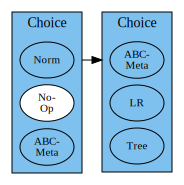

In [35]:
exp_pipe.visualize()

In [36]:
exp_pipe_trained = exp_pipe_trainable.fit(X_train_le, y_train_le)

100%|██████████| 5/5 [00:10<00:00,  2.12s/trial, best loss: -0.8985432786738693]


In [37]:
exp_pipe_trained.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,-0.770925,0.346684,0.543585,ok
p1,1,-0.898543,0.186526,0.299538,ok
p2,2,-0.895539,0.236223,0.840145,ok
p3,3,-0.888771,0.473193,1.553462,ok
p4,4,-0.719423,0.295208,0.659414,ok


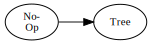

In [38]:
exp_pipe_trained.get_pipeline().visualize()

In [39]:
best_estimator1 = exp_pipe_trained.summary().loss.argmin()
worst_estimator1 = exp_pipe_trained.summary().loss.argmax()

In [40]:
print(f'The best pipeline is {best_estimator1} and the worst pipeline is {worst_estimator1}')

The best pipeline is p1 and the worst pipeline is p4


In [46]:
#we use normal X_test because of Schema errors; we can fix this by hardcasting a schema if we wish
predictions2 = exp_pipe_trained.predict(X_test_le)
print(f'accuracy {sklearn.metrics.accuracy_score(y_test_le, predictions2):.1%}')
print(f'roc_accuracy {sklearn.metrics.roc_auc_score(y_test_le, predictions2):.1%}')

accuracy 90.2%
roc_accuracy 59.1%


In [47]:
exp_pipe_trained.get_pipeline().pretty_print(show_imports=False, ipython_display=True)

```python
tree = Tree(criterion='entropy', max_features=0.45417021765935595, min_samples_leaf=20, min_samples_split=0.029853785357759316)
pipeline = NoOp() >> tree
```

In [51]:
class_names = [0, 1]

idx = 15

ip_lime = LimeTabularExplainer(X_test_le.values, class_names=class_names, feature_names = X_test_le.columns )

print(f'the predicted class is: {exp_pipe_trained.get_pipeline().predict_proba([X_test_le.values[0]])}')
print(f'The true class: {y_test.iloc[idx]}')

ip_exp = ip_lime.explain_instance(X_test_le.values[idx], exp_pipe_trained.get_pipeline().predict_proba, num_features=6, labels= class_names)
print(f'Document id: {idx}')

the predicted class is: [[0.98417266 0.01582734]]
The true class: 0
Document id: 15


In [52]:
ip_exp.show_in_notebook(show_table = True, show_all = False)

In [53]:
#lets visualize using shap
ip_shap = KernelExplainer(exp_pipe_trained.get_pipeline().predict_proba, shap.kmeans(X_test_le, 300)) #kmeans clusters 32980 points into 100 for prototypes
print(type(ip_shap))

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'aix360.algorithms.shap.shap_wrapper.KernelExplainer'>


In [54]:
ip_shap_values  = ip_shap.explain_instance(X_test_le.iloc[0,:])

In [55]:
shap.initjs()
shap.force_plot(ip_shap.explainer.expected_value[0], ip_shap_values[0], X_test_le.iloc[0, :])

## Lets do more explaining, but a bit more complicated!
### Contrastive Explanations!

We now provide a brief overview of the method. As mentioned above the algorithm outputs a contrastive explanation which consists of two parts: a) pertinent negatives (PNs) and b) pertinent positives (PPs). PNs identify a minimal set of features which if altered would change the classification of the original input. For example, in the loan case if a person's credit score is increased their loan application status may change from reject to accept. The manner in which the method accomplishes this is by optimizing a change in the prediction probability loss while enforcing an elastic norm constraint that results in minimal change of features and their values. Optionally, an auto-encoder may also be used to force these minimal changes to produce realistic PNs. PPs on the other hand identify a minimal set of features and their values that are sufficient to yield the original input's classification. For example, an individual's loan may still be accepted if the salary was 50K as opposed to 100K. Here again we have an elastic norm term so that the amount of information needed is minimal, however, the first loss term in this case tries to make the original input's class to be the winning class. 

In [56]:
Z = np.vstack((X_train_le, X_test_le))
Zmax = np.max(Z, axis=0)
Zmin = np.min(Z, axis=0)

#normalize an array of samples to range [-0.5, 0.5]
def normalize(V):
    VN = (V - Zmin)/(Zmax - Zmin)
    VN = VN - 0.5
    return(VN)
    
# rescale a sample to recover original values for normalized values. 
def rescale(X):
    return(np.multiply ( X + 0.5, (Zmax - Zmin) ) + Zmin)

N = normalize(Z)
xn_train = N[0:X_train_le.shape[0], :]
xn_test  = N[X_train_le.shape[0]:, :]
print(len(xn_train), len(xn_test))

32950 8238


In [57]:
#lets import what we will need to make a baby Neural Network! 
#there may be an error when installing Keras, so make sure that you uninstall and reinstall correct version
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

#what we need for explanations
from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer

Using TensorFlow backend.


In [67]:
def nn_small():
    model = Sequential()
    model.add(Dense(10, input_dim=19, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))    
    return model

In [68]:
# Set random seeds for repeatability
np.random.seed(1) 
tf.set_random_seed(2) 

class_names = ['Not Open', ' Open']

# loss function
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

# compile and print model summary
nn = nn_small()
nn.compile(loss=fn, optimizer='adam', metrics=['accuracy'])
nn.summary()


# train model or load a trained model
#if running for the first time change this to True
TRAIN_MODEL = True

if (TRAIN_MODEL):             
    nn.fit(xn_train, y_train, batch_size=128, epochs=200, verbose=1, shuffle=False)
    nn.save_weights("/Users/eovito@ibm.com/Desktop/AIXWorkshops/portuguese_bank_nnsmall.h5")     
else:    
    nn.load_weights("/Users/eovito@ibm.com/Desktop/AIXWorkshops/portugues_bank_nnsmall.h5")
        

# evaluate model accuracy        
score = nn.evaluate(xn_train, y_train, verbose=0) #Compute training set accuracy
#print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = nn.evaluate(xn_test, y_test, verbose=0) #Compute test set accuracy
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                200       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 22        
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32950/32950 [==============================] - 1s 17us/step - loss: 0.1581 - acc: 0.9967
Epoch 2/200
32950/32950 [==============================] - 0s 7us/step - loss: 0.1626 - acc: 0.9975
Epoch 3/200
32950/32950 [==============================] - 0s 7us/step - lo

In [69]:
nn.predict_proba(xn_test[200].reshape((1,) + xn_test[200].shape))

array([[-1.2377133e+10, -1.2377142e+10]], dtype=float32)

In [70]:
# Some interesting user samples to try [for no]: 5082, 3233, 3700
idx = 300

X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
print("Computing PN for Sample:", idx)
print("Prediction made by the model:", nn.predict_proba(X))
print("Prediction probabilities:", class_names[np.argmax(nn.predict_proba(X))])
print("")

mymodel = KerasClassifier(nn)
explainer = CEMExplainer(mymodel)

#can play around with these arguments
arg_mode = 'PN' # Find pertinent negatives
arg_max_iter = 1000 # Maximum number of iterations to search for the optimal PN for given parameter settings
arg_init_const = 10.0 # Initial coefficient value for main loss term that encourages class change
arg_b = 9 # No. of updates to the coefficient of the main loss term
arg_kappa = 0.1 # Minimum confidence gap between the PNs (changed) class probability and original class' probability
arg_beta = 1e-1 # Controls sparsity of the solution (L1 loss)
arg_gamma = 100 # Controls how much to adhere to a (optionally trained) auto-encoder
my_AE_model = None # Pointer to an auto-encoder

# Find PN for applicant 1272
(adv_pn, delta_pn, info_pn) = explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b,
                                                         arg_max_iter, arg_init_const, arg_beta, arg_gamma)

Computing PN for Sample: 300
Prediction made by the model: [[-8.954736e+09 -8.954743e+09]]
Prediction probabilities: Not Open

iter:0 const:[10.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-8954735616.0000, max_nontarget_lab_score:-10000.0000

iter:500 const:[10.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-8954735616.0000, max_nontarget_lab_score:-10000.0000

iter:0 const:[100.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-8954735616.0000, max_nontarget_lab_score:-10000.0000

iter:500 const:[100.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-8954735616.0000, max_nontarget_lab_score:-10000.0000

iter:0 const:[1000.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:-8954

In [71]:
Xpn = adv_pn
classes = [ class_names[np.argmax(nn.predict_proba(X))], class_names[np.argmin(nn.predict_proba(Xpn))], 'NIL' ]

print("Sample:", idx)
print("prediction(X)", nn.predict_proba(X), class_names[np.argmax(nn.predict_proba(X))])
print("prediction(Xpn)", nn.predict_proba(Xpn), class_names[np.argmin(nn.predict_proba(Xpn))] )


X_re = rescale(X) # Convert values back to original scale from normalized
Xpn_re = rescale(Xpn)
Xpn_re = np.around(Xpn_re.astype(np.double), 2)

delta_re = Xpn_re - X_re
delta_re = np.around(delta_re.astype(np.double), 2)
delta_re[np.absolute(delta_re) < 1e-4] = 0

X3 = np.vstack((X_re, Xpn_re, delta_re))

dfre = pd.DataFrame.from_records(X3) # Create dataframe to display original point, PN and difference (delta)
dfre[23] = classes

dfre.columns = df.columns
dfre.rename(index={0:'X',1:'X_PN', 2:'(X_PN - X)'}, inplace=True)
dfret = dfre.transpose()


def highlight_ce(s, col, ncols):
    if (type(s[col]) != str):
        if (s[col] > 0):
            return(['background-color: yellow']*ncols)    
    return(['background-color: white']*ncols)

dfret.style.apply(highlight_ce, col='(X_PN - X)', ncols=3, axis=1)

Sample: 300
prediction(X) [[-8.954736e+09 -8.954743e+09]] Not Open
prediction(Xpn) [[-2.3290988e+09 -2.3291005e+09]]  Open


,X,X_PN,(X_PN - X)
age,17,38.5,21.5
job,9,5.5,-3.5
marital,1,1.5,0.5
education,5,3.5,-1.5
default,0,1,1
housing,1,1,0
loan,1,1,0
contact,0,0.5,0.5
month,6,4.5,-1.5
day_of_week,2,2,0


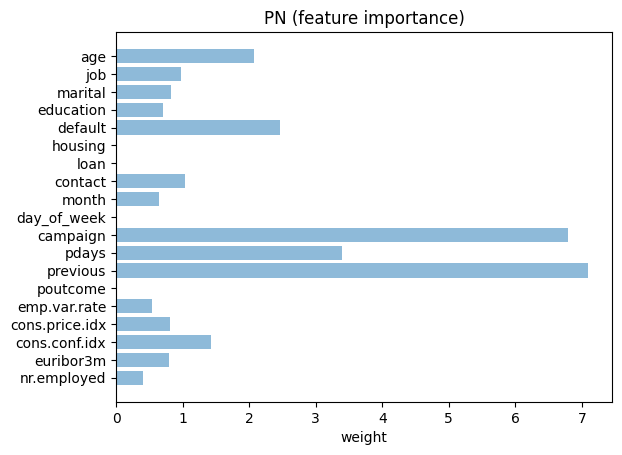

In [72]:
plt.rcdefaults()
fi = abs((X-Xpn).astype('double'))/np.std(xn_train.astype('double'), axis=0) # Compute PN feature importance
objects = df.columns[-2::-1]
y_pos = np.arange(len(objects))
performance = fi[0, -1::-1]

plt.barh(y_pos, performance, align='center', alpha=0.5) # bar chart
plt.yticks(y_pos, objects) # Display features on y-axis
plt.xlabel('weight') # x-label
plt.title('PN (feature importance)') # Heading

plt.show() # Display PN feature importance

In [73]:
# Pertinent Positives
idx = 3700

X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
print("Computing PP for Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(nn.predict_proba(X))])
print("Prediction probabilities:", nn.predict_proba(X))
print("")


mymodel = KerasClassifier(nn)
explainer = CEMExplainer(mymodel)

arg_mode = 'PP' # Find pertinent positives
arg_max_iter = 1000 # Maximum number of iterations to search for the optimal PN for given parameter settings
arg_init_const = 10.0 # Initial coefficient value for main loss term that encourages class change
arg_b = 9 # No. of updates to the coefficient of the main loss term
arg_kappa = 0.1 # Minimum confidence gap between the PNs (changed) class probability and original class' probability
arg_beta = 1e-1 # Controls sparsity of the solution (L1 loss)
arg_gamma = 100 # Controls how much to adhere to a (optionally trained) auto-encoder
my_AE_model = None # Pointer to an auto-encoder

(adv_pp, delta_pp, info_pp) = explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b,
                                                         arg_max_iter, arg_init_const, arg_beta, arg_gamma)

Computing PP for Sample: 3700
Prediction made by the model: Not Open
Prediction probabilities: [[-8.865231e+09 -8.865238e+09]]

iter:0 const:[10.]
Loss_Overall:40703176.0000, Loss_Attack:40703176.0000
Loss_L2Dist:1.1780, Loss_L1Dist:2.5193, AE_loss:0.0
target_lab_score:-4080317.7500, max_nontarget_lab_score:-10000.0000

iter:500 const:[10.]
Loss_Overall:40703176.0000, Loss_Attack:40703176.0000
Loss_L2Dist:0.7062, Loss_L1Dist:1.7889, AE_loss:0.0
target_lab_score:-4080317.7500, max_nontarget_lab_score:-10000.0000

iter:0 const:[5.]
Loss_Overall:20351590.0000, Loss_Attack:20351588.0000
Loss_L2Dist:1.1780, Loss_L1Dist:2.5193, AE_loss:0.0
target_lab_score:-4080317.7500, max_nontarget_lab_score:-10000.0000

iter:500 const:[5.]
Loss_Overall:20351590.0000, Loss_Attack:20351588.0000
Loss_L2Dist:1.1780, Loss_L1Dist:2.5193, AE_loss:0.0
target_lab_score:-4080317.7500, max_nontarget_lab_score:-10000.0000

iter:0 const:[2.5]
Loss_Overall:10175795.0000, Loss_Attack:10175794.0000
Loss_L2Dist:1.1780, L

In [74]:
Xpp = delta_pp
classes = [ class_names[np.argmax(nn.predict_proba(X))], class_names[np.argmax(nn.predict_proba(Xpp))]]

print("PP for Sample:", idx)
print("Prediction(Xpp) :", class_names[np.argmax(nn.predict_proba(Xpp))])
print("Prediction probabilities for Xpp:", nn.predict_proba(Xpp))
print("")

X_re = rescale(X) # Convert values back to original scale from normalized
adv_pp_re = rescale(adv_pp)
Xpp_re = X_re - adv_pp_re
Xpp_re = np.around(Xpp_re.astype(np.double), 2)
Xpp_re[Xpp_re < 1e-4] = 0

X2 = np.vstack((X_re, Xpp_re))

dfpp = pd.DataFrame.from_records(X2.astype('double')) # Showcase a dataframe for the original point and PP
dfpp[23] = classes
dfpp.columns = df.columns
dfpp.rename(index={0:'X',1:'X_PP'}, inplace=True)
dfppt = dfpp.transpose()

dfppt.style.apply(highlight_ce, col='X_PP', ncols=2, axis=1)

PP for Sample: 3700
Prediction(Xpp) : Not Open
Prediction probabilities for Xpp: [[-1.0843372e+09 -1.0843379e+09]]



,X,X_PP
age,52,15.3
job,2,0
marital,1,0
education,3,0
default,0,0
housing,0,0
loan,0,0
contact,0,0
month,4,1.32
day_of_week,4,0


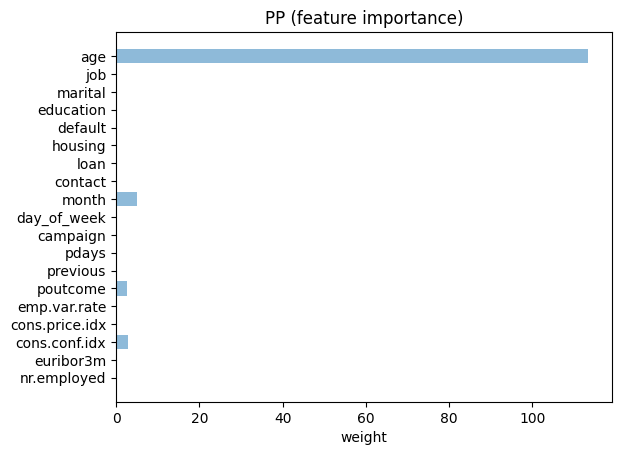

In [75]:
plt.rcdefaults()
fi = abs(Xpp_re.astype('double'))/np.std(xn_train.astype('double'), axis=0) # Compute PP feature importance
    
objects = df.columns[-2::-1]
y_pos = np.arange(len(objects)) # Get input feature names
performance = fi[0, -1::-1]

plt.barh(y_pos, performance, align='center', alpha=0.5) # Bar chart
plt.yticks(y_pos, objects) # Plot feature names on y-axis
plt.xlabel('weight') #x-label
plt.title('PP (feature importance)') # Figure heading

plt.show()    # Display the feature importance

## If you have time, we would love your feedback!

## http://ibm.biz/xai-aug-31